# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load data

In [2]:
housing = pd.read_csv(r'D:\chennai_house_price_prediction.csv')
print(housing.head())
if 'AREA' in housing.columns:
    housing['AREA']=housing['AREA'].replace(
    {
        'Chrompt':'Chrompet',
        'Chrmpet':'Chrompet',
        'Chormpet':'Chrompet',
        'Karapakam':'Karapakkam',
        'KKNagar':'KK Nagar',
        'Velchery':'Velachery',
        'Ana Nagar':'Anna Nagar',
        'Ann Nagar':'Anna Nagar',
        'Adyr':'Adyar',
        'TNagar':'T Nagar'
    }
    )
    housing['AREA']=housing['AREA'].str.title()
if 'SALE_COND' in housing.columns:
    housing['SALE_COND']=housing['SALE_COND'].replace(
    {
        'Adj Land':'AdjLand',
        'Partiall':'Partial',
        'PartiaLl':'Partial',
        'Ab Normal':'AbNormal'
    }
    )
    housing['SALE_COND']=housing['SALE_COND'].str.title()
if 'PARK_FACIL' in housing.columns:
    housing['PARK_FACIL']=housing['PARK_FACIL'].replace(
    {
        'Noo':'No'
    }
    )
    housing['PARK_FACIL']=housing['PARK_FACIL'].str.title()
if 'BUILDTYPE' in housing.columns:
    housing['BUILDTYPE']=housing['BUILDTYPE'].replace(
    {
        'Comercial':'Commercial',
        'Other':'Others'
    }
    )
    housing['BUILDTYPE']=housing['BUILDTYPE'].str.title()
if 'UTILITY_AVAIL' in housing.columns:
    housing['UTILITY_AVAIL']=housing['UTILITY_AVAIL'].replace(
    {
        'All Pub':'AllPub',
        'NoSewr':'NoSeWa'
    }
    )
    housing['UTILITY_AVAIL']=housing['UTILITY_AVAIL'].str.title()
if 'STREET' in housing.columns:
    housing['STREET']=housing['STREET'].replace(
    {
        'Pavd':'Paved',
        'NoAccess':'No Access'
    }
    )
    housing['STREET']=housing['STREET'].str.title()

   PRT_ID        AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  P03210  Karapakkam      1004            131        1.0         1.0       3   
1  P09411  Anna Nagar      1986             26        2.0         1.0       5   
2  P01812       Adyar       909             70        1.0         1.0       3   
3  P05346   Velachery      1855             14        3.0         2.0       5   
4  P06210  Karapakkam      1226             84        1.0         1.0       3   

  SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  COMMIS  SA

## Dataset Columns

In [3]:
print("Dataset Columns:")
print(housing.columns.tolist())

Dataset Columns:
['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE']


## Dataset Information

In [4]:
print("Dataset Information\n\n")
housing.info()

Dataset Information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7110 non-null   object 
 1   AREA           7110 non-null   object 
 2   INT_SQFT       7110 non-null   int64  
 3   DIST_MAINROAD  7110 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7105 non-null   float64
 6   N_ROOM         7110 non-null   int64  
 7   SALE_COND      7110 non-null   object 
 8   PARK_FACIL     7110 non-null   object 
 9   BUILDTYPE      7110 non-null   object 
 10  UTILITY_AVAIL  7110 non-null   object 
 11  STREET         7110 non-null   object 
 12  MZZONE         7110 non-null   object 
 13  QS_ROOMS       7110 non-null   float64
 14  QS_BATHROOM    7110 non-null   float64
 15  QS_BEDROOM     7110 non-null   float64
 16  QS_OVERALL     7062 non-null   float64
 17  COMMIS         7110 non-null  

## Summary Statistics

In [5]:
print("Summary Statistics:\n\n")
housing.describe()

Summary Statistics:




,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7110.000000,7110.000000,7109.000000,7105.000000,7110.000000,7110.000000,7110.000000,7110.000000,7062.000000,7110.000000,7.110000e+03
mean,1382.047398,99.596203,1.637220,1.213371,3.688889,3.517539,3.507257,3.485443,3.503324,141002.772152,1.089371e+07
std,457.383827,57.402087,0.803008,0.409716,1.019146,0.891928,0.897771,0.887286,0.527219,78762.947460,3.769706e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84235.750000,8.271425e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127595.500000,1.033484e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184497.000000,1.299350e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


## Missing values

In [6]:
print("Missing Values:\n\n")
housing.isnull().sum()

Missing Values:




PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
# plt.figure(figsize=(20,5))
# sns.heatmap(housing.isnull())

## Correlations


Correlation of features with SALES_PRICE:
SALES_PRICE      1.000000
COMMIS           0.626130
INT_SQFT         0.612023
N_ROOM           0.602060
N_BEDROOM        0.330269
N_BATHROOM       0.108203
QS_ROOMS         0.021786
QS_OVERALL       0.020245
DIST_MAINROAD    0.019052
QS_BEDROOM       0.018430
QS_BATHROOM     -0.011406
Name: SALES_PRICE, dtype: float64


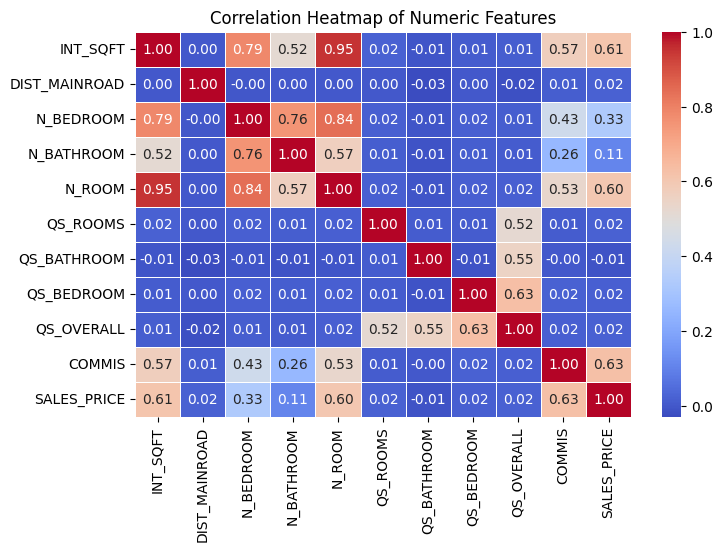

In [8]:
correlation = housing.corr(numeric_only=True)
print("\nCorrelation of features with SALES_PRICE:")
print(correlation["SALES_PRICE"].sort_values(ascending=False))
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Handling Missing Values

In [9]:
# Handling missing values
housing['N_BEDROOM'].fillna(housing['N_BEDROOM'].mode()[0], inplace=True)
housing['N_BATHROOM'].fillna(housing['N_BATHROOM'].mode()[0], inplace=True)
housing['QS_OVERALL'].fillna(housing['QS_OVERALL'].mean(), inplace=True)

In [10]:
# Splitting the dataset into features (X) and target variable (y)
X = housing.drop("SALES_PRICE", axis=1)
y = housing["SALES_PRICE"]

In [11]:
X

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS
0,P03210,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,Allpub,Paved,A,4.0,3.9,4.9,4.330,144400
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,Allpub,Gravel,RH,4.9,4.2,2.5,3.765,304049
2,P01812,Adyar,909,70,1.0,1.0,3,Abnormal,Yes,Commercial,Elo,Gravel,RL,4.1,3.8,2.2,3.090,92114
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,Nosewr,Paved,I,4.7,3.9,3.6,4.010,77042
4,P06210,Karapakkam,1226,84,1.0,1.0,3,Abnormal,Yes,Others,Allpub,Gravel,C,3.0,2.5,4.1,3.290,74063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,Nosewa,No Access,RH,3.6,4.5,3.3,3.920,205551
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,Nosewa,Gravel,I,4.3,4.2,2.9,3.840,167028
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,Elo,Paved,RL,4.6,3.8,4.1,4.160,119098
7108,P09794,Velachery,1896,156,3.0,2.0,5,Partial,Yes,Others,Elo,Paved,I,3.1,3.5,4.3,3.640,79812


In [12]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7105    10818480
7106     8351410
7107     8507000
7108     9976480
7109     2334556
Name: SALES_PRICE, Length: 7110, dtype: int64

## Counts based on sales price

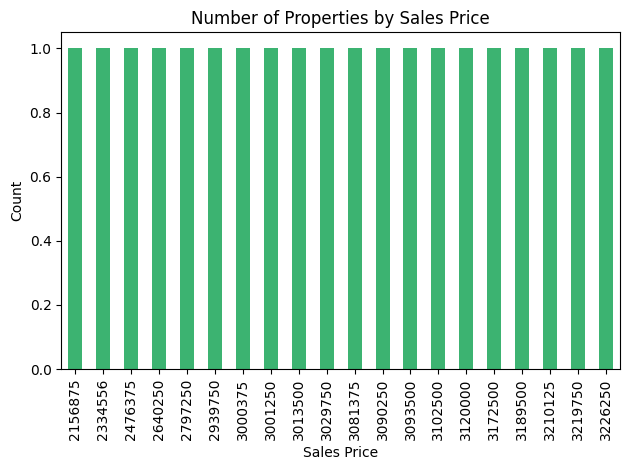

In [13]:
unique_sales_price=housing['SALES_PRICE'].value_counts().sort_index()
unique_sales_price
unique_sales_price.head(20).plot(kind='bar', color='mediumseagreen')
plt.title('Number of Properties by Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Identifying numerical and categorical columns

In [14]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

In [15]:
print("Numeric columns:",numerical_cols)

Numeric columns: Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'COMMIS'],
      dtype='object')


In [16]:
numeric_cols = X.select_dtypes(include=["int64", "float64"])
print("Number of numeric columns:", len(numeric_cols.columns))

Number of numeric columns: 10


In [17]:
print("categorical_cols:",categorical_cols)

categorical_cols: Index(['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')


In [18]:
category_cols = X.select_dtypes(include=["int64", "float64"])
print("Number of categorical columns:", len(category_cols.columns))

Number of categorical columns: 10


## Preprocessing pipeline for numerical data

In [19]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())  # Standardize numerical data
])

# Preprocessing pipeline for categorical data
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

## Train-test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training and evaluation function

In [21]:
all_metrics = {} 
def evaluate_model(model):
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Training the model
    model_pipeline.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__} - MSE: {mse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    all_metrics[model.__class__.__name__] = {
        'MSE': round(mse, 2),
        'MAE': round(mae, 2),
        'R2': round(r2, 2)
    }
# Define models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]

# Evaluate models
for model in models:
    evaluate_model(model)
    with open(r'D:\house_price_prediction\Model\evaluation_metrics.json', 'w') as f:
        json.dump(all_metrics, f, indent=4)
print("Evaluation metrics saved successfully!")

LinearRegression - MSE: 1731518311073.76, MAE: 1060522.56, R-squared: 0.88
DecisionTreeRegressor - MSE: 587210673635.32, MAE: 594602.21, R-squared: 0.96
RandomForestRegressor - MSE: 269716971196.65, MAE: 402347.95, R-squared: 0.98
GradientBoostingRegressor - MSE: 192272218101.72, MAE: 342257.48, R-squared: 0.99
Evaluation metrics saved successfully!


## Saving Model

In [22]:
def predict_random_entries(model):
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)  # Fitting the model
    return model_pipeline
model_pipeline = predict_random_entries(RandomForestRegressor(random_state=42))
joblib.dump(model_pipeline, r"D:\house_price_prediction\Model\chennai_house_price_prediction_model.sav")
print("Model saved successfully")# Dumping the model

Model saved successfully


## Loading model and predicting with random data entries

In [23]:
model_loaded = joblib.load(r"D:\house_price_prediction\Model\chennai_house_price_prediction_model.sav")

random_data = pd.DataFrame({
    'PRT_ID': ['P10001', 'P10002', 'P10003', 'P10004', 'P10005'],
    'AREA': ['Adyar', 'Anna Nagar', 'Velachery', 'Karapakkam', 'T Nagar'],
    'INT_SQFT': [1200, 1800, 1500, 1000, 2000],
    'DIST_MAINROAD': [50, 100, 200, 150, 80],
    'N_BEDROOM': [3, 2, 4, 2, 3],
    'N_BATHROOM': [2, 1, 2, 1, 2],
    'N_ROOM': [5, 6, 6, 4, 6],
    'SALE_COND': ['AbNormal', 'Family', 'AbNormal', 'AbNormal', 'Family'],
    'PARK_FACIL': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'BUILDTYPE': ['Commercial', 'Others', 'Commercial', 'Others', 'Commercial'],
    'UTILITY_AVAIL': ['AllPub', 'NoSewr', 'AllPub', 'AllPub', 'AllPub'],
    'STREET': ['Paved', 'Gravel', 'Paved', 'Gravel', 'Paved'],
    'MZZONE': ['A', 'RH', 'RL', 'I', 'C'],
    'QS_ROOMS': [4, 5, 4, 3, 4],
    'QS_BATHROOM': [3.9, 4.2, 3.5, 4.0, 3.7],
    'QS_BEDROOM': [4.5, 3.8, 4.3, 3.9, 4.0],
    'QS_OVERALL': [4.0, 3.8, 4.2, 4.1, 3.9],
    'COMMIS': [120000, 200000, 150000, 180000, 170000]
})

predictions = model_loaded.predict(random_data)
print(f"Predicted price for property : ₹{predictions[0]:,.2f}")

Predicted price for property : ₹14,053,355.80
